# Recurrent Neural Networks

https://github.com/saqemlas/deep-learning-specialization/blob/main/5_SequenceModels/week_1/Assignment/Building_a_Recurrent_Neural_Network_Step_by_Step.ipynb

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [3]:
start_char = 1
oov_char = 2  # out of vocabulary
index_from = 3

In [65]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features, maxlen=maxlen, start_char=start_char, oov_char=oov_char, index_from=index_from)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [66]:
input_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
len(input_train[3])

147

In [9]:
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in input_train[3])
decoded_sequence

"[START] worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the [OOV] and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

In [11]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [12]:
input_train[3:]

array([[   0,    0,    0, ...,    7,   61,  113],
       [   0,    0,    0, ...,    2,   10,   10],
       [   0,    0,    0, ...,   55,   52, 1901],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [13]:
len(input_train[0])

500

In [14]:
input_train[3]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [16]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шар для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [17]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#len(model.layers[0].weights[0][0])
len(model.layers[0].weights[0][0])# one vector of length 32 per word -> this is learnt

32

In [29]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
126/126 [==============================] - 8s 55ms/step - loss: 0.6121 - acc: 0.6537 - val_loss: 0.5997 - val_acc: 0.6848
Epoch 2/5
126/126 [==============================] - 7s 54ms/step - loss: 0.3763 - acc: 0.8444 - val_loss: 0.3809 - val_acc: 0.8358
Epoch 3/5
126/126 [==============================] - 7s 55ms/step - loss: 0.2752 - acc: 0.8933 - val_loss: 0.4788 - val_acc: 0.8245
Epoch 4/5
126/126 [==============================] - 7s 55ms/step - loss: 0.2012 - acc: 0.9273 - val_loss: 0.4054 - val_acc: 0.8495
Epoch 5/5
126/126 [==============================] - 7s 58ms/step - loss: 0.1522 - acc: 0.9449 - val_loss: 0.3952 - val_acc: 0.8602


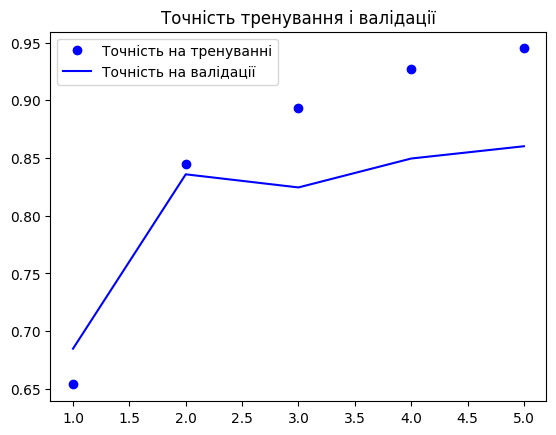

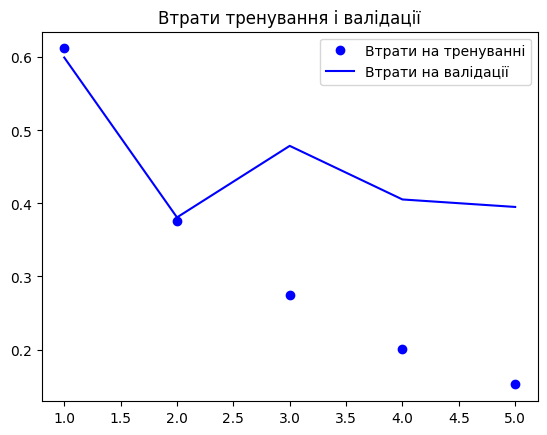

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

## Embedding
![embedding](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-11/example3.png)

In [32]:
# Let's take a detailed look at how the Embedding layer and the SimpleRNN layer can be implemented
import numpy as np

# Custom implementation of the Embedding layer
class CustomEmbedding:
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        # Initialize embedding matrix with random values
        self.embeddings_matrix = np.random.randn(input_dim, output_dim)

    def forward(self, input_sequence):
        # Retrieve embeddings for input sequence
        embeddings = [self.embeddings_matrix[word_index] for word_index in input_sequence]
        return np.array(embeddings)

## RNN and hidden layers

## Sequence classification
![embedding](https://textbook.edu.goit.global/python/data-science-remaster/v1/img/module-11/example3.png)

In [33]:
# Custom implementation of the SimpleRNN layer
class CustomSimpleRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        # Initialize weights for input-to-hidden and hidden-to-hidden connections
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        # Initialize bias
        self.b = np.zeros((1, hidden_dim))
        # Initialize hidden state
        self.h = None

    def forward(self, input_sequence):
        # Initialize hidden state with zeros
        self.h = np.zeros((1, self.hidden_dim))
        # Iterate over each timestep in input sequence
        for input_t in input_sequence:
            # Compute hidden state at current timestep
            self.h = np.tanh(np.dot(input_t, self.Wx) + np.dot(self.h, self.Wh) + self.b)
        return self.h



In [34]:
# Custom implementation of the Dense layer - for a sequence classification
class CustomDense:
    def __init__(self, input_dim, output_dim, activation):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.activation = activation
        # Initialize weights and bias
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.zeros((1, output_dim))

    def forward(self, x):
        # Compute affine transformation
        z = np.dot(x, self.W) + self.b
        # Apply activation function
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.activation == 'relu':
            return np.maximum(0, z)

In [35]:
# Instantiate custom layers
custom_embedding_layer = CustomEmbedding(input_dim=max_features, output_dim=32)  # max_features = 10000
custom_simple_rnn_layer = CustomSimpleRNN(input_dim=32, hidden_dim=32)
custom_dense_layer = CustomDense(input_dim=32, output_dim=1, activation='sigmoid')


In [36]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [37]:
# Forward pass through custom layers

embedded_sequence = custom_embedding_layer.forward(input_train[0])
len(embedded_sequence) # each word encoded into a 32-element vector

500

In [40]:
embedded_sequence[-1]

array([ 1.3401731 , -0.77541347, -0.04910915, -1.0618275 ,  0.25784207,
        1.01518642,  0.86883141,  0.88385683,  1.20877458, -0.17798971,
       -0.88581377, -0.67783056, -0.3129774 ,  1.63239106,  0.82813796,
       -0.98466233,  0.85565313,  0.11060844, -0.11965438,  0.62795134,
       -0.00633514,  0.78984429,  0.46031058, -0.74639098, -2.10314516,
       -1.16736457, -0.65616781, -1.42804203,  1.82075213, -0.07866964,
       -0.54047586, -0.21641669])

In [41]:
rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
rnn_output

array([[ 1.        , -0.95615739,  0.99585065, -0.99910608, -0.94991437,
         0.99877559,  0.99998411,  0.99744244,  0.99999759, -0.28962849,
         0.77470052,  1.        ,  0.99289522, -0.99999746, -0.99999979,
         0.99598312, -0.99073223, -0.7898034 ,  0.06095491,  1.        ,
        -0.99993559, -1.        ,  0.99999998, -0.99999999,  0.99715202,
        -0.99999842,  1.        , -0.99935165,  0.99993466,  0.99589087,
         0.99806422,  0.58241797]])

In [42]:
predictions = custom_dense_layer.forward(rnn_output)
predictions

array([[0.07233797]])

In [43]:
# Backward pass through custom layers
loss = predictions - y_train[0]  # Gradient of loss with respect to dense layer output
loss[0]

array([-0.92766203])

In [44]:
y_train[0]

1

In [45]:
custom_simple_rnn_layer.Wh

array([[ 0.74557408, -0.90574126,  0.03777221, ..., -0.22813328,
         0.87523927, -0.57478025],
       [-1.46010233,  0.97770226, -0.47619497, ..., -0.19643253,
         1.49320543,  1.41327377],
       [-0.70557477, -0.21795816, -0.56861734, ..., -0.52195631,
        -1.03266921, -1.21331997],
       ...,
       [ 0.13556108, -0.69687829, -0.56413507, ...,  0.01075176,
        -0.5107888 , -1.44256393],
       [ 1.50013185,  0.28738983, -0.5631022 , ..., -0.32535067,
         0.30213251, -0.18468102],
       [ 0.10397587,  1.08695997, -2.11007072, ...,  1.58503107,
         0.1659262 , -0.05963968]])

### Token classification

In [48]:
import numpy as np

# для порівняння:
"""
class CustomSimpleRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        self.b = np.zeros((1, hidden_dim))
        self.h = None

    def forward(self, input_sequence):
        # Initialize hidden state with zeros
        self.h = np.zeros((1, self.hidden_dim))
        for input_t in input_sequence:
            self.h = np.tanh(np.dot(input_t, self.Wx) + np.dot(self.h, self.Wh) + self.b)
        return self.h
"""
class CustomSimpleRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        self.b = np.zeros((1, hidden_dim))
        self.h = None

    def forward(self, input_sequence):
        self.h = np.zeros((len(input_sequence), self.hidden_dim))
        for t in range(len(input_sequence)):
            self.h[t] = np.tanh(np.dot(input_sequence[t], self.Wx) + np.dot(self.h[t-1], self.Wh) + self.b)
        return self.h


In [49]:
class CustomDense:
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.W = np.random.randn(input_dim, output_dim)
        self.b = np.zeros((1, output_dim))

    def forward(self, x):
        z = np.dot(x, self.W) + self.b
        return z
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def softmax_output(self, x):
        z = np.dot(x, self.W) + self.b
        return self.softmax(z)

In [51]:
# Instantiate custom layers
custom_embedding_layer = CustomEmbedding(input_dim=max_features, output_dim=32)
custom_simple_rnn_layer = CustomSimpleRNN(input_dim=32, hidden_dim=32)
# Output dimension is set to the number of tokens in the input sequence
num_classes = 2  # Assuming `maxlen` is the maximum length of input sequence
custom_dense_layer = CustomDense(input_dim=32, output_dim=num_classes)

# Forward pass through custom layers
embedded_sequence = custom_embedding_layer.forward(input_train[0])
embedded_sequence

array([[-0.01062308, -0.35930819, -0.07756129, ..., -1.05983644,
        -0.95564628,  2.08880035],
       [-0.01062308, -0.35930819, -0.07756129, ..., -1.05983644,
        -0.95564628,  2.08880035],
       [-0.01062308, -0.35930819, -0.07756129, ..., -1.05983644,
        -0.95564628,  2.08880035],
       ...,
       [-0.78310652, -1.1966252 , -0.22453827, ..., -0.07508624,
         0.05517735,  0.64267265],
       [-0.83895254, -0.21799211, -1.05366489, ...,  0.41139271,
         1.18438644,  1.6074146 ],
       [ 0.62070695,  1.26116653, -1.8065756 , ...,  0.03408415,
         1.7100507 , -0.70975141]])

In [55]:
rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
len(rnn_output[0])

32

In [56]:
predictions = custom_dense_layer.forward(rnn_output)
predictions

array([[-2.34510622e+00, -2.72920586e+00],
       [-8.61354845e+00, -1.21238279e+00],
       [-6.45435172e+00,  1.32372437e+00],
       [-6.00222591e+00,  2.37844491e+00],
       [-5.56815236e+00,  3.08965005e+00],
       [-5.35874377e+00,  2.61253817e+00],
       [-5.69056366e+00,  2.56307048e+00],
       [-4.78360433e+00,  2.92686638e+00],
       [-5.60548830e+00,  2.47180756e+00],
       [-5.48376426e+00,  2.68506826e+00],
       [-5.16375661e+00,  2.87809637e+00],
       [-5.66735811e+00,  2.54030008e+00],
       [-4.97436693e+00,  2.79818925e+00],
       [-5.49158222e+00,  2.58974487e+00],
       [-5.47666677e+00,  2.61815511e+00],
       [-5.10042696e+00,  2.88102743e+00],
       [-5.63624638e+00,  2.54869456e+00],
       [-5.07619770e+00,  2.75425826e+00],
       [-5.44524286e+00,  2.64719654e+00],
       [-5.46676421e+00,  2.60133970e+00],
       [-5.09651568e+00,  2.86131023e+00],
       [-5.61128292e+00,  2.56126189e+00],
       [-5.11121113e+00,  2.73345373e+00],
       [-5.

## Text generation

In [57]:
class CustomSimpleRNNGeneration:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.Wx = np.random.randn(input_dim, hidden_dim)
        self.Wh = np.random.randn(hidden_dim, hidden_dim)
        self.b = np.zeros((1, hidden_dim))
        self.h = None

    def forward(self, input_sequence):
        # Initialize hidden state with zeros
        self.h = np.zeros((1, self.hidden_dim))
        for input_t in input_sequence:
            self.h = np.tanh(np.dot(input_t, self.Wx) + np.dot(self.h, self.Wh) + self.b)
        return self.h

# Instantiate custom layers
custom_embedding_layer = CustomEmbedding(input_dim=max_features, output_dim=32)
custom_simple_rnn_layer = CustomSimpleRNNGeneration(input_dim=32, hidden_dim=32)
# Output dimension is set to the vocabulary size, representing the probability distribution over characters
vocab_size = 10000  # Example vocabulary size
custom_dense_layer = CustomDense(input_dim=32, output_dim=vocab_size)

# Forward pass through custom layers
embedded_sequence = custom_embedding_layer.forward(input_train[0])
embedded_sequence

array([[ 1.09109811, -0.81354669,  0.48967099, ..., -0.18190887,
        -0.33566969,  0.74767855],
       [ 1.09109811, -0.81354669,  0.48967099, ..., -0.18190887,
        -0.33566969,  0.74767855],
       [ 1.09109811, -0.81354669,  0.48967099, ..., -0.18190887,
        -0.33566969,  0.74767855],
       ...,
       [ 0.81120555,  0.5749492 , -0.94452363, ..., -0.24063135,
         2.45048068, -0.45367264],
       [ 0.97207749,  1.34019827,  1.14081881, ..., -1.00967624,
        -1.40512279, -1.33841743],
       [ 1.31542853, -0.36240894, -0.1749052 , ..., -1.03296549,
        -0.25864069, -1.42659857]])

In [58]:
rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
rnn_output

array([[-0.99998846, -0.52107286,  0.98347644, -0.86306137, -0.99999517,
        -0.8861889 , -1.        , -1.        ,  0.93211334,  1.        ,
        -0.99999786, -0.99999495,  0.34796525,  0.99995414,  0.99991854,
        -0.99760043,  1.        ,  1.        ,  0.99944727,  0.96090678,
         0.9675623 ,  0.98271556,  0.99999938, -0.99999939, -1.        ,
         1.        , -1.        ,  1.        ,  0.99998727,  1.        ,
         0.99999863,  0.99999517]])

In [60]:
predictions = custom_dense_layer.softmax_output(rnn_output)
len(predictions[0])

10000

In [61]:
# Assuming `start_sequence` is a seed sequence to start the generation process
start_sequence = "hello"

# Initialize the generated text with the seed sequence
generated_text = [start_sequence]

# Set the number of words to generate
num_words_to_generate = 10

# Generate text character by character
for _ in range(num_words_to_generate):
    # Convert the current generated text to input sequence
    input_sequence = [word_index[char] for char in generated_text]
    print(input_sequence)
    input_sequence = np.array(input_sequence)[np.newaxis, :]  # Add batch dimension
    
    # Forward pass through custom layers
    embedded_sequence = custom_embedding_layer.forward(input_sequence)
    rnn_output = custom_simple_rnn_layer.forward(embedded_sequence)
    predictions = custom_dense_layer.softmax_output(rnn_output)
    
    # Sample the next character based on the output distribution
    next_char_index = np.argmax(predictions[-1])
    next_char = inverted_word_index[next_char_index]
    
    # Append the next character to the generated text
    generated_text.append(next_char)

print("Generated text:", generated_text)

[4822]
[4822, 5744]
[4822, 5744, 5982]
[4822, 5744, 5982, 7107]
[4822, 5744, 5982, 7107, 3696]
[4822, 5744, 5982, 7107, 3696, 9228]
[4822, 5744, 5982, 7107, 3696, 9228, 4281]
[4822, 5744, 5982, 7107, 3696, 9228, 4281, 5617]
[4822, 5744, 5982, 7107, 3696, 9228, 4281, 5617, 3009]
[4822, 5744, 5982, 7107, 3696, 9228, 4281, 5617, 3009, 1917]
Generated text: ['hello', 'agency', 'rear', 'meteor', 'indians', 'adequately', 'performer', 'curly', 'sides', 'witty', 'level']


### Encoder-decoder

![encoder-decoder](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*1JcHGUU7rFgtXC_mydUA_Q.jpeg)

https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346

In [62]:
from keras.models import Model
from keras.layers import Input, Embedding, SimpleRNN, Dense

# Define input sequence length and dimensions
max_features = 10000
input_length = 500
embedding_dim = 32
hidden_units = 32

# Encoder
encoder_inputs = Input(shape=(input_length,))
encoder_embedding = Embedding(max_features, embedding_dim)(encoder_inputs)
encoder_rnn, encoder_state = SimpleRNN(hidden_units, return_state=True)(encoder_embedding)

# Decoder
decoder_inputs = Input(shape=(input_length,))
decoder_embedding = Embedding(max_features, embedding_dim)(decoder_inputs)
decoder_rnn = SimpleRNN(hidden_units, return_sequences=True)(decoder_embedding, initial_state=encoder_state)
decoder_outputs = Dense(max_features, activation='softmax')(decoder_rnn)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [63]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 500)]                0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 500, 32)              320000    ['input_1[0][0]']             
                                                                                                  
 embedding_2 (Embedding)     (None, 500, 32)              320000    ['input_2[0][0]']             
                                                                                              